In [10]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from importlib import reload 
import torch
import fasttext

In [18]:
corpus = lang_util.Corpus('/Users/jgordon/nta/datasets/PTB')

In [137]:
import rsm_samplers
import rsm
from ptb import lang_util
import rsm_experiment
reload(rsm_samplers)
reload(rsm)
reload(lang_util)
reload(rsm_experiment)

CONFIG = {
    'debug': False,
    'path': "/Users/jgordon/nta/results",
    'data_dir': "/Users/jgordon/nta/datasets",
    'dataset': 'ptb',
    'predictor_hidden_size': 1200,
    'predictor_output_size': 10000,
    'batch_size': 300,
    'batches_in_epoch': 2000,
    'batches_in_first_epoch': 2,
    'batch_log_interval': 2000,
    'vocab_size': 10000,
    'eval_interval': 3,
    'eval_batch_size': 10,
    'eval_batches_in_epoch': 8243,
    'learning_rate': 0.0005,
    'm_groups': 1500,
    'n_cells_per_group': 1,
    'k_winners': 80,
    'k_winner_cells': 1,
    'pred_l2_reg': 0.000001,
    'dec_l2_reg': 0.000001,
    'input_bias': True,
    'eval_interval': 5,
    'eps': 0.5,
    'gamma': 0.0,
    'forget_mu': 0.025,
    'weight_sparsity': None,
    'mult_integration': False,
    'fpartition': None,
    'boost_strength': 0.5,
    'boost_strength_factor': 0.85,
    'boost_strat': 'col_boosting',
    'do_inhibition': False,
    'x_b_norm': True,
    'balance_part_winners': True,
    'decode_activation_fn': None,
    'decode_bias': False,
    'embed_dim': 100,
    'input_size': (1, 100),
    'output_size': 100,
    'embedding_kind': 'ptb_fasttext',
    'max_decay': 0.95,
    'mem_floor': 0.0005,
    'trainable_decay': True,
    'word_cache_decay': 0.99
}
    
exp = rsm_experiment.RSMExperiment(config=CONFIG)

setup: Using cpu
Maybe download PTB...


Built dataloaders...
Created <RSMLayer m=1500 n=1 k=80 d_in=100 eps=0.50 /> with 2554500 trainable params
Created RSMNet with 1 layer(s)


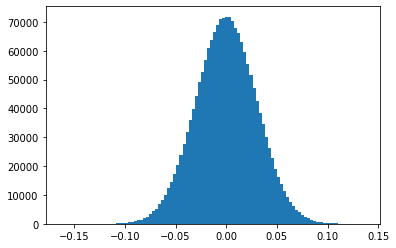

Loading from /Users/jgordon/Desktop/checkpoint_47


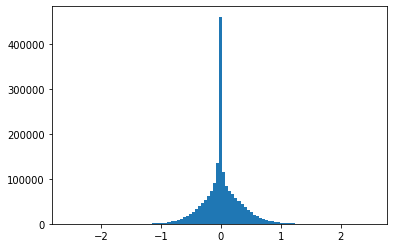

In [146]:
exp.corpus = corpus
exp.model_setup(CONFIG)

plt.hist(exp.predictor.layers[0].weight.flatten().data, bins=100)
plt.show()

exp.model_restore("/Users/jgordon/Desktop/checkpoint_47")

plt.hist(exp.predictor.layers[0].weight.flatten().data, bins=100)
plt.show()
# exp.model._zero_kwinner_boost()

In [139]:
exp.eval_epoch(0)

Evaluating...
Finished batch 0
Partial train pred acc - epoch: 10.000%, batch acc: 10.000%, batch ppl: 515.2
Targ: it    was   n't   black monday <eos> but while the new york stock exchange did n't   fall apart friday as     the   
Pred: <unk> <eos> <unk> <eos> <unk>  N     the the   the the to   <unk> <unk>    to  <unk> have <unk> the    monday <unk> 
Finished batch 2000
Partial train pred acc - epoch: 7.231%, batch acc: 0.000%, batch ppl: 1298.3
Finished batch 4000
Partial train pred acc - epoch: 7.298%, batch acc: 10.000%, batch ppl: 461.0
Finished batch 6000
Partial train pred acc - epoch: 7.292%, batch acc: 10.000%, batch ppl: 578.8
Finished batch 8000
Partial train pred acc - epoch: 7.418%, batch acc: 10.000%, batch ppl: 251.3


{'val_loss': 0.05627574627069063,
 'val_interp_ppl': 718.0260963248543,
 'val_pred_ppl': 718.0261035687389,
 'val_pred_acc': 7.40143151765134}

In [134]:
wcs = []
uss = []
ppls = []

for wc in torch.arange(0.001, .11, 0.05):
    for us in torch.arange(0.001, .11, 0.05):
        print("wc: %s, us: %s" % (wc.item(), us.item()))
        exp.word_cache_pct = wc.item()
        exp.unif_smoothing = us.item()
        ret = exp.eval_epoch(0)
        int_ppl = ret['val_interp_ppl']
        ppls.append(int_ppl)
        wcs.append(wc.item())
        uss.append(us.item())
        print(ret)

wc: 0.0010000000474974513, us: 0.0010000000474974513
Evaluating...
Finished batch 0
Partial train pred acc - epoch: 10.000%, batch acc: 10.000%, batch ppl: 515.2
Targ: it    was   n't   black monday <eos> but while the new york stock exchange did n't   fall apart friday as     the   
Pred: <unk> <eos> <unk> <eos> <unk>  N     the the   the the to   <unk> <unk>    to  <unk> have <unk> the    monday <unk> 
Finished batch 2000
Partial train pred acc - epoch: 7.231%, batch acc: 0.000%, batch ppl: 1298.3
Finished batch 4000
Partial train pred acc - epoch: 7.298%, batch acc: 10.000%, batch ppl: 461.0
Finished batch 6000
Partial train pred acc - epoch: 7.292%, batch acc: 10.000%, batch ppl: 578.8
Finished batch 8000
Partial train pred acc - epoch: 7.418%, batch acc: 10.000%, batch ppl: 251.3
{'val_loss': 0.056269402140178656, 'val_interp_ppl': 703.0267103396865, 'val_pred_ppl': 718.0261035687389, 'val_pred_acc': 7.40143151765134}
wc: 0.0010000000474974513, us: 0.050999999046325684
Evaluating.

KeyboardInterrupt: 

In [136]:
exp.train_epoch(1)

Finished batch 0
Partial train pred acc - epoch: 6.000%, batch acc: 6.000%, batch ppl: 1200.3


KeyboardInterrupt: 

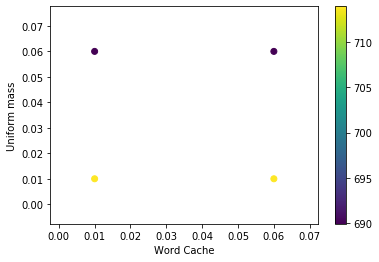

In [97]:
import matplotlib.pyplot as plt

plt.scatter(wcs, uss, c=ppls)
plt.xlabel("Word Cache")
plt.ylabel("Uniform mass")
plt.colorbar()

In [98]:
import numpy as np
idx = np.argmin(ppls)
print(wcs[idx], uss[idx])

0.05999999865889549 0.05999999865889549
